<a href="https://colab.research.google.com/github/VongolaXIman/107-2-Multimedia/blob/master/Class7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High-pass filters

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

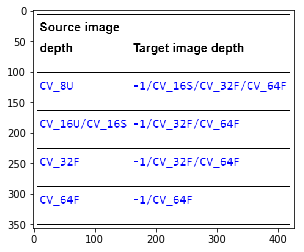

In [3]:
img = cv2.imread('/content/drive/My Drive/107-2Multimedia/06_00.png', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
import cv2
j = 0
for filename in dir(cv2):
  if filename.startswith('CV_'):
    print(filename)
    j+=1
print('Ther are ' + str(j) + 'image depth in OpenCV')

CV_16S
CV_16SC1
CV_16SC2
CV_16SC3
CV_16SC4
CV_16U
CV_16UC1
CV_16UC2
CV_16UC3
CV_16UC4
CV_32F
CV_32FC1
CV_32FC2
CV_32FC3
CV_32FC4
CV_32S
CV_32SC1
CV_32SC2
CV_32SC3
CV_32SC4
CV_64F
CV_64FC1
CV_64FC2
CV_64FC3
CV_64FC4
CV_8S
CV_8SC1
CV_8SC2
CV_8SC3
CV_8SC4
CV_8U
CV_8UC1
CV_8UC2
CV_8UC3
CV_8UC4
CV_FEATURE_PARAMS_HAAR
CV_FEATURE_PARAMS_HOG
CV_FEATURE_PARAMS_LBP
Ther are 38image depth in OpenCV


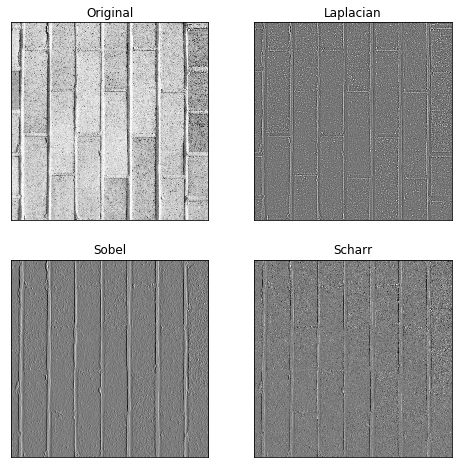

In [5]:
img = cv2.imread('/content/drive/My Drive/107-2Multimedia/1.3.12.tiff',0)

laplacian = cv2.Laplacian(img,ddepth=cv2.CV_32F,ksize=17,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

sobel = cv2.Sobel(img,ddepth=cv2.CV_32F,dx=1,dy=0,ksize=11,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

scharr = cv2.Scharr(img,ddepth=cv2.CV_32F,dx=1,dy=0,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

images=[img,laplacian,sobel,scharr]

titles=['Original','Laplacian','Sobel','Scharr']

plt.figure(num='HPF e.g',figsize=(8,8)) 
for i in range(4):
	plt.subplot(2,2,i+1)
	plt.imshow(images[i],cmap = 'gray')
	plt.title(titles[i]),
	plt.xticks([]), plt.yticks([])
plt.show()

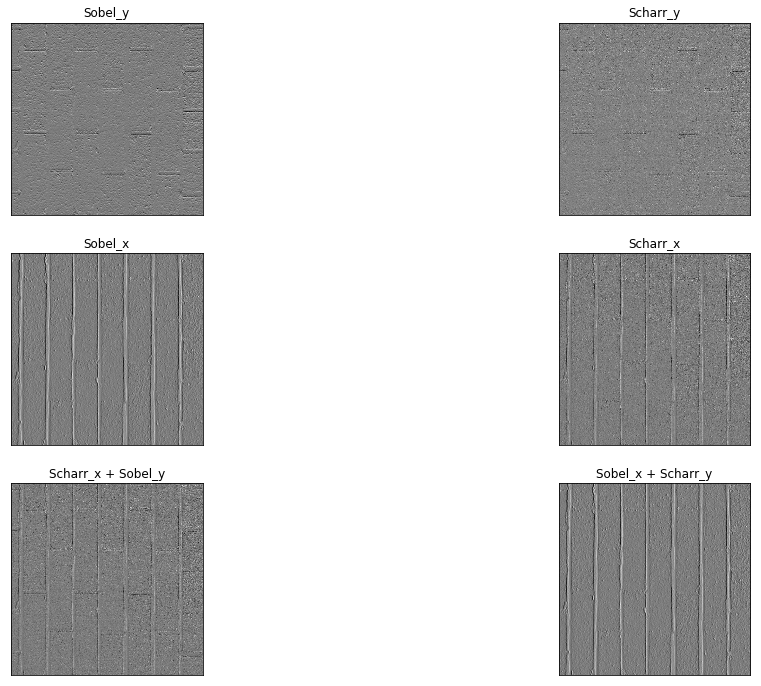

In [6]:
img = cv2.imread('/content/drive/My Drive/107-2Multimedia/1.3.12.tiff',0)

sobel_y = cv2.Sobel(img,ddepth=cv2.CV_32F,dx=0,dy=1,ksize=11,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

scharr_y = cv2.Scharr(img,ddepth=cv2.CV_32F,dx=0,dy=1,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

sobel_x = cv2.Sobel(img,ddepth=cv2.CV_32F,dx=1,dy=0,ksize=11,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

scharr_x = cv2.Scharr(img,ddepth=cv2.CV_32F,dx=1,dy=0,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

scharr_x_sobel_y = cv2.add(scharr_x,scharr_y)

sobel_x_scharr_y = cv2.add(sobel_x,scharr_y)

images=[sobel_y,scharr_y,sobel_x,scharr_x,scharr_x_sobel_y,sobel_x_scharr_y]

titles=['Sobel_y','Scharr_y','Sobel_x','Scharr_x','Scharr_x + Sobel_y','Sobel_x + Scharr_y']

plt.figure(num='Exercise e.g',figsize=(18,12)) 
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i],cmap = 'gray')
    plt.title(titles[i]),
    plt.xticks([]), plt.yticks([])
plt.show()

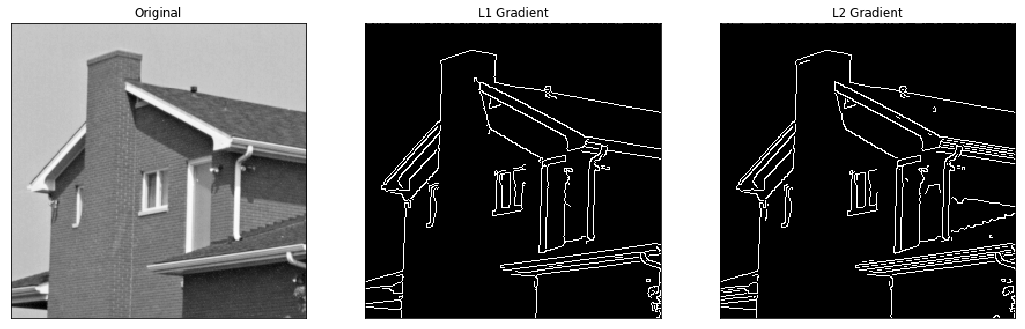

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/My Drive/107-2Multimedia/4.1.05.tiff',0)
edges1 = cv2.Canny(img,50,300,L2gradient=False)
edges2 = cv2.Canny(img,100,150,L2gradient=True)

images = [img,edges1,edges2]
titles = ['Original','L1 Gradient','L2 Gradient']

plt.figure(num='Canny e.g',figsize=(18,8))
for i in range(3):
	plt.subplot(1,3,i+1)
	plt.imshow(images[i],cmap = 'gray')
	plt.title(titles[i]),
	plt.xticks([]), plt.yticks([])
plt.show()


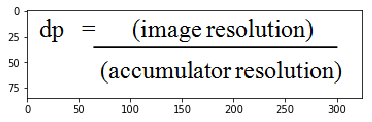

In [8]:
img = cv2.imread('/content/drive/My Drive/107-2Multimedia/06_04.PNG', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

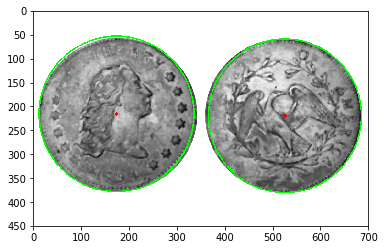

In [14]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/My Drive/107-2Multimedia/Valuable-Coins-5-Most-Valuable-US-Coins-1794-Flowing-Hair-Dollar.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,100,
                            param1=200,param2=70,minRadius=100,maxRadius=200)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(255,0,0),3)

plt.imshow(cimg)
plt.show()

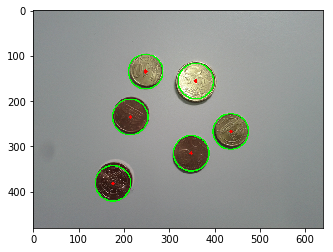

In [30]:
import cv2

# while (True):
frame = cv2.imread('/content/drive/My Drive/107-2Multimedia/coins.png',1)
frame2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
	
grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
blur = cv2.blur(grey,(5,5))
	
circles = cv2.HoughCircles(blur,cv2.HOUGH_GRADIENT,1,50,
                            param1=40,param2=20,minRadius=30,maxRadius=40)


if circles is not None:
	for i in circles [0,:]:
		cv2.circle(frame2,(i[0],i[1]),i[2],(0,255,0),2)
		cv2.circle(frame2,(i[0],i[1]),2,(255,0,0),3)
# 			print(i)
plt.imshow(frame2)
plt.show()

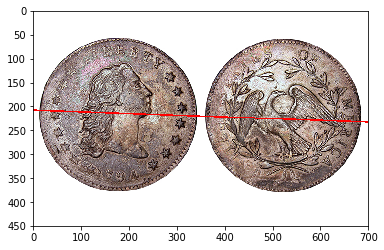

In [42]:
import numpy as np
import cv2

# cam = cv2.VideoCapture(0)

# while (1):

# 	ret, img = cam.read()

img = cv2.imread('/content/drive/My Drive/107-2Multimedia/Valuable-Coins-5-Most-Valuable-US-Coins-1794-Flowing-Hair-Dollar.jpg',1)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,250,apertureSize=5,L2gradient=True)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

if lines is not None:
  for rho,theta in lines[0]:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      pts1 = ( int(x0 + 1000*(-b)) , int(y0 + 1000*(a)) )
      pts2 = ( int(x0 - 1000*(-b)) , int(y0 - 1000*(a)) )
      cv2.line(img2,pts1,pts2,(255,0,0),2)

plt.imshow(img2)
plt.show()

# 	cv2.imshow('Detected Lines',img)
# 	if cv2.waitKey(1)  == 27:
#                 break

# cv2.destroyAllWindows()
# cam.release()


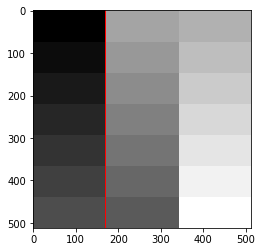

In [43]:
import numpy as np
import cv2

# cam = cv2.VideoCapture(0)

# while (1):

# 	ret, img = cam.read()

img = cv2.imread('/content/drive/My Drive/107-2Multimedia/gray21.512.tiff',1)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,250,apertureSize=5,L2gradient=True)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

if lines is not None:
  for rho,theta in lines[0]:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      pts1 = ( int(x0 + 1000*(-b)) , int(y0 + 1000*(a)) )
      pts2 = ( int(x0 - 1000*(-b)) , int(y0 - 1000*(a)) )
      cv2.line(img2,pts1,pts2,(255,0,0),2)

plt.imshow(img2)
plt.show()

# 	cv2.imshow('Detected Lines',img)
# 	if cv2.waitKey(1)  == 27:
#                 break

# cv2.destroyAllWindows()
# cam.release()